In [2]:
#Import libraries
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import galsim
import time
#from galsim.gsparams import GSParams
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import shape_measurement as sm
import cPickle

In [3]:
#fil=open('/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/measErrs_nobulgedisk_rot0deg.pkl')
filename='/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/measErrs_diskonly_rot0deg_lambda800_shear0.0-0.0_10000gals_metacalshear_lanczos100.pkl'
fil1 = open(filename)
resmetacal=cPickle.load(fil1)
fil1.close()

fil2 = open('/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/measErrs_diskonly_rot0deg_lambda800_shear0.0-0.0_10000gals_shearfirst_lanczos100.pkl')
resshearfirst=cPickle.load(fil2)
fil2.close()




In [4]:
rece1, rece2, shearList1, hlr1, sn1, q1, phiList1, ident1 = resmetacal #sometimes there is an extra gals entry at the end
she1, she2, shearList2, hlr2, sn2, q2, phiList2, ident2  = resshearfirst
print shearList1

[galsim.Shear(0j)]


In [94]:
cuts_nan=(~(np.isnan(rece1[0]) | np.isnan(rece2[0]))) & (~(np.isnan(she1[0]) | np.isnan(she2[0])))
qcuts = (hlr1<100)#&(sn1<1.5)&(sn1>0.5)
cuts = qcuts & cuts_nan
extended_cuts = cuts.reshape(1,len(cuts))
extended_cuts = np.repeat(extended_cuts, len(shearList1), axis=0)

hlr0,q0, sn0, ident0, phiList0 = hlr1[cuts],q1[cuts],sn1[cuts], np.array(ident1)[cuts], np.array(phiList1)[cuts]
rece10, rece20, she10, she20 = rece1[extended_cuts], rece2[extended_cuts], she1[extended_cuts], she2[extended_cuts]


In [96]:
diff1, diff2 = rece10 - she10, rece20 - she20

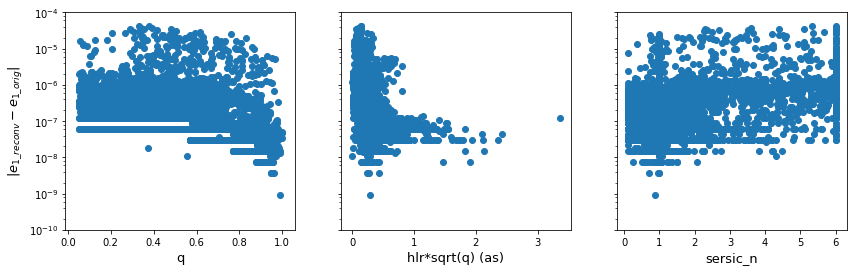

In [97]:
xoptions={'q':q0,'hlr*sqrt(q) (as)':hlr0,'sersic_n':sn0}
yarr = (diff1)
if np.all(yarr==diff1):
    ylabel='$|e_{1\_reconv}-e_{1\_orig}|$'
else:
    ylabel='$|e_{2\_reconv}-e_{2\_orig}|$'
fig,ax=plt.subplots(1,3,sharey=True,figsize=(14,4))
for i,xchoice in enumerate(xoptions.keys()):
    xarr = xoptions[xchoice]
    ax[i].scatter(xarr,np.abs(yarr))
    #print np.nanmin(yarr),np.nanmax(yarr)
    ax[i].set_ylim(1e-10,1e-4)
    ax[i].set_yscale('log')
    ax[0].set_ylabel(ylabel,size=13)
    ax[i].set_xlabel(xchoice,size=13)
#plt.suptitle('abs(metacal_e1 - observable_e1) lambda550, 0deg rotation, shear e=(0.01, 0)')
#plt.tight_layout()
#plt.savefig('/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/metacal-obs_lam550_0degrotation_hist.png')
# if 'hlr' in xchoice:
#     plt.xlim(0,60)
#plt.axhline(1e-3,linestyle=':',c='k')
#plt.savefig('/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/errs_vs_'+xchoice+'.png')

In [102]:
print np.sum(np.abs(yarr)<1e-12)

3021


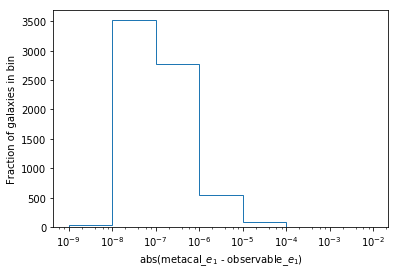

In [83]:
fig,ax=plt.subplots()
arr = np.abs(yarr)
#weights = np.ones_like(arr)/float(len(arr))
hist1,bins1,patch=plt.hist(arr, bins=np.logspace(-9,-2, 8),histtype='step')
ax.set_xscale('log')
plt.xlabel('abs(metacal_$e_1$ - observable_$e_1$)')
plt.ylabel('Fraction of galaxies in bin')
#plt.savefig('/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/e1_metacal-obs_hist.png')
#ax.set_yscale('log')

In [84]:
print np.sum(hist1)

6972.0


In [27]:
# fig,ax=plt.subplots(figsize=(12,8))
# plt.scatter(hlr0,q0,c=yarr0,norm=LogNorm(),vmin=1e-5,vmax=1e-2,alpha=1.,cmap=cm.inferno,s=16)
# plt.xlabel('hlr',size=13)
# plt.ylabel('q',size=13)
# ax.set_xscale('log')
# plt.colorbar()

In [85]:
nanmask = qcuts & (~cuts_nan)
qnan, hlrnan = q1[nanmask], hlr1[nanmask]

In [86]:
print np.max(yarr[yarr>0])
print np.max(yarr), np.min(yarr)

4.3392181396484375e-05
4.3392181396484375e-05 -3.7029385566711426e-06


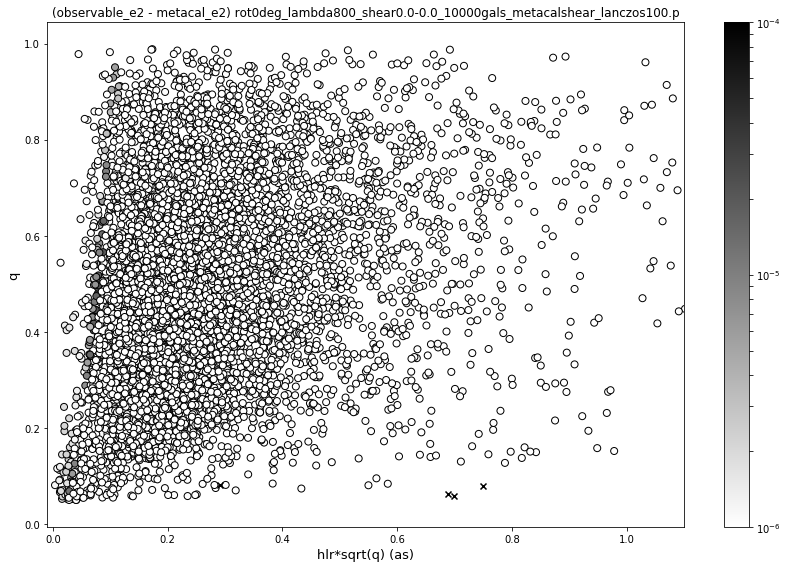

In [45]:
fig,ax=plt.subplots(figsize=(12,8))
#plt.scatter(hlr0*np.sqrt(q0),q0,c=yarr0,norm=LogNorm(),vmin=1e-5,vmax=1e-2,alpha=1.,cmap=cm.inferno,s=16)
vmax=1e-4
#plt.scatter(hlr0,q0,c=yarr,alpha=1., vmin=-vmax,vmax=vmax,cmap=cm.bwr,s=16)
plt.scatter(hlr0, q0, c=np.abs(yarr)+1e-13, vmin=1e-6, s=49,vmax=vmax, cmap=cm.gray_r,edgecolor='k', norm=LogNorm())
plt.xlabel('hlr*sqrt(q) (as)',size=13)
plt.ylabel('q',size=13)
#ax.set_xscale('log')
plt.xlim(-0.01,1.1)
#plt.ylim(0.85,1.)
plt.colorbar()
plt.scatter(hlrnan,qnan,marker='x',c='k')

title = '(observable_e2 - metacal_e2) '+filename[filename.find('rot'):filename.find('200')-1]
plt.title(title)
plt.tight_layout()
#plt.savefig('/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/metacal-obs_lam800_00degrotation_noshear.png')

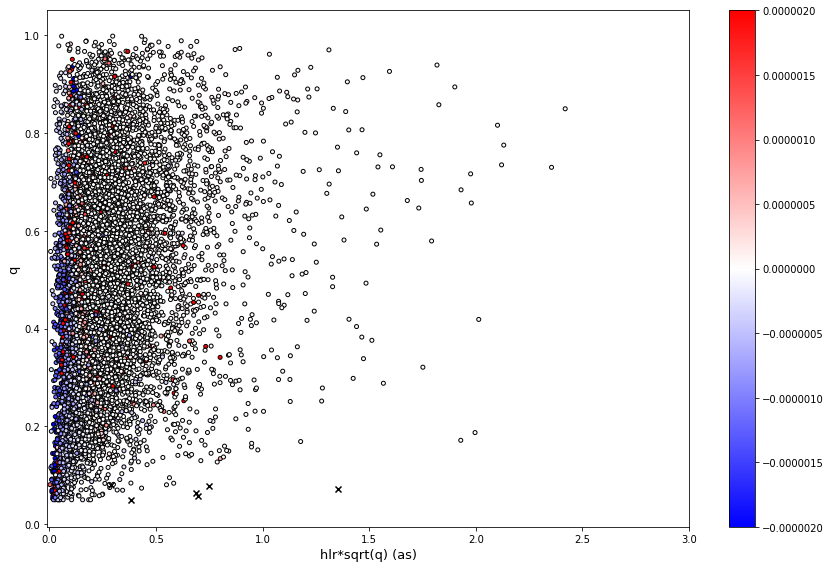

In [103]:
fig,ax=plt.subplots(figsize=(12,8))
#plt.scatter(hlr0*np.sqrt(q0),q0,c=yarr0,norm=LogNorm(),vmin=1e-5,vmax=1e-2,alpha=1.,cmap=cm.inferno,s=16)
vmax=2e-6
plt.scatter(hlr0,q0,c=yarr,alpha=1., vmin=-vmax,vmax=vmax,cmap=cm.bwr,s=16)

plt.xlabel('hlr*sqrt(q) (as)',size=13)
plt.ylabel('q',size=13)
#ax.set_xscale('log')
plt.xlim(-0.01,3.0)
#plt.ylim(0.85,1.)
plt.colorbar()
plt.scatter(hlrnan,qnan,marker='x',c='k')

#plt.title('(metacal_e1 - observable_e1) lambda550, 0 deg rotation, shear e=(0.01, 0)')
plt.tight_layout()
#plt.savefig('/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/measErrs_diskonly_rot00deg_lambda800_shear0.0-0.0_10000gals_lanczos100.png')

In [ ]:
#The below can probably be deleted eventually, but I'll keep it for now

In [9]:
badGals = (sde10>5e-3) & (hlr0*np.sqrt(q0)>30)
identBad = ident0[badGals]

In [10]:
print identBad

[ 164666  196679 1201847]


In [71]:
#gsparams = galsim.GSParams(kvalue_accuracy=1.e-5,maximum_fft_size=2048*10,maxk_threshold=9.e-4)
gsparams = galsim.GSParams(maximum_fft_size=2048*10)

cc = galsim.COSMOSCatalog(dir='/disks/shear15/KiDS/ImSim/pipeline/data/COSMOS_25.2_training_sample/',use_real=False)
identifiers = cc.param_cat['IDENT']
galsIndex = np.array([np.where(identifiers == bad)[0][0] for bad in identBad])
gals = cc.makeGalaxy(galsIndex, chromatic=False,gsparams=gsparams)
sersicparams = cc.param_cat['sersicfit']
hlr,n,q = sersicparams[:,1], sersicparams[:,2], sersicparams[:,3]
hlrbad, nbad, qbad = hlr[galsIndex], n[galsIndex], q[galsIndex]
sde1bad = sde10[badGals]

In [83]:
print galsIndex

[ 8316  9264 10042]


In [78]:
def removeBulge(gal):
    if type(gal) != galsim.compound.Sum:
        return gal
    else:
        disk = gal.obj_list[1]
        return disk

for i in range(len(identBad)):
    gals[i] = removeBulge(gals[i])

In [79]:
params= zip(np.round(hlrbad,2),np.round(nbad,2),np.round(qbad,2),np.round(sde1bad,4))
print params

[(41.48, 0.9, 0.79, 0.0064), (36.72, 0.93, 0.71, 0.0086), (37.86, 1.32, 0.7, 0.0077)]


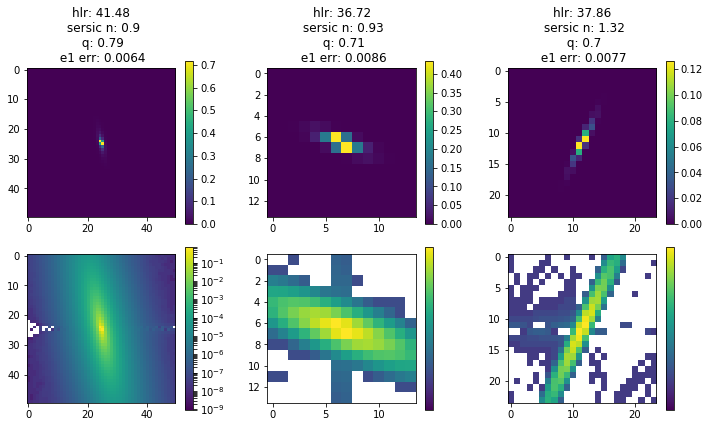

In [81]:
from matplotlib.colors import LogNorm
pixel_scale = 0.1
fig,ax = plt.subplots(2,3,figsize=(10,6))
for i,gal in enumerate(gals):
    im = gal.drawImage(scale = pixel_scale/2.)
    a0=ax[0,i].imshow(im.array)
    a1=ax[1,i].imshow(im.array, norm=LogNorm())
    fig.colorbar(a0,ax=ax[0,i])
    fig.colorbar(a1,ax=ax[1,i])
    ax[0,i].set_title('hlr: %s\n sersic n: %s\n q: %s\n e1 err: %s' % (params[i]))
plt.tight_layout()
#plt.savefig('/home/rosenberg/Documents/wl-bias-leaps-top/shear_bias_outputs/badgalaxies.png')

[(41.48, 0.9, 0.79), (36.72, 0.93, 0.71), (37.86, 1.32, 0.7)]


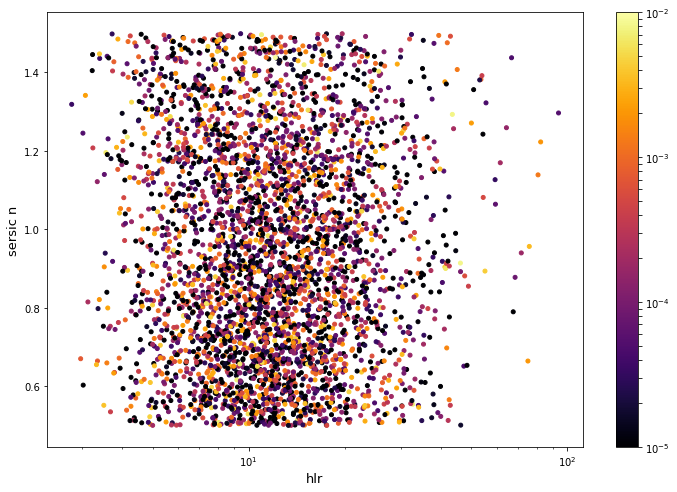

In [9]:
fig,ax=plt.subplots(figsize=(12,8))
plt.scatter(hlr0,sn0,c=yarr0,norm=LogNorm(),vmin=1e-5,vmax=1e-2,alpha=1.,cmap=cm.inferno,s=16)
plt.xlabel('hlr',size=13)
plt.ylabel('sersic n',size=13)
ax.set_xscale('log')
#ax.set_yscale('log')
plt.colorbar()

(array([2482., 1576.,  883.,  524.,  327.,  285.,  231.,  186.,  175.,
         537.]),
 array([0.50003697, 1.05003328, 1.60002958, 2.15002588, 2.70002218,
        3.25001849, 3.80001479, 4.35001109, 4.90000739, 5.4500037 ,
        6.        ]),
 <a list of 10 Patch objects>)

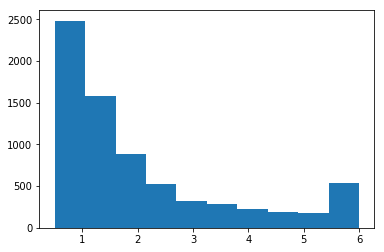

In [10]:
plt.hist(sn)

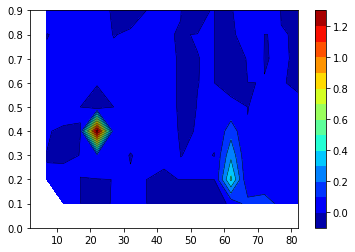

In [124]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
x,y = hlr0, q0
z = sde20

xi = np.arange(2,87,5)
yi = np.arange(0.0,1,0.1)
# grid the data.
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
# plot data points.
#plt.scatter(x,y,marker='o',c='b',s=5)
plt.show()


In [146]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# cut=sde2>1e-3
# ax.scatter(sn[cut],q[cut],np.log10(sde1[cut]),c='b')
# ax.scatter(sn[~cut],q[~cut],np.log10(sde1[~cut]),c='r')

# ax.set_xlim(0,100)


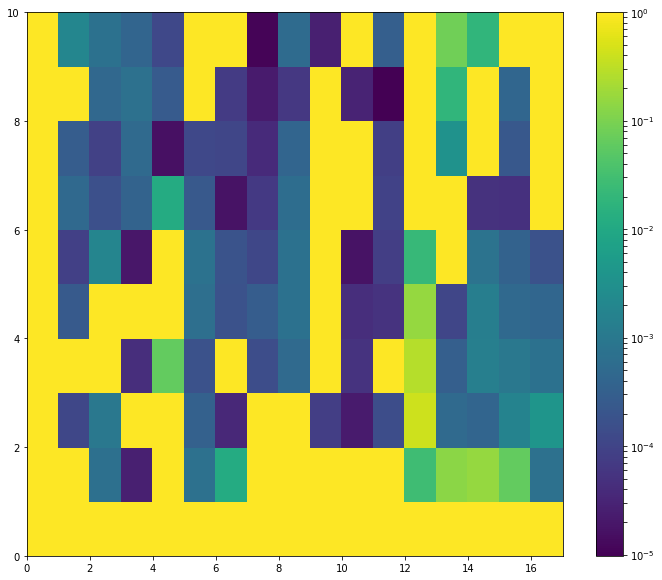

In [126]:
fig = plt.figure(figsize=(12,10))
zi[np.isnan(zi)] = 1000
zi[zi<=0] = 1000
plt.pcolormesh(zi,norm=LogNorm(),vmax=1)
plt.colorbar()